  Segundo a OMS as doenças cardiovasculares são as maiores causadoras de mortes no Brasil e no Mundo. Estima-se que,anualmente, ocorram cerca de 17,9 milhões de mortes causada por essas patologias, sendo que um terço dessas ocorrem em indivíduos que ainda não atingiram os 70 anos de idade. Os riscos para doenças cardiovasculares incluem pressão, glicemia e colesterol (especialmente o LDL) altos, sobrepeso e a obesidade. Os riscos comportamentais incluem o sedentarismo, má alimentação, cigarro e uso excessivo de álcool.(OMS,2020)
  
  Esse trabalho possui o objetivo de estudar a predição de doenças cardiovasculares, a partir de variáveis conhecidas como risco à essas doenças, assim como definir quais dessas características possuem um peso maior na predição. Para esse estudo utilizamos o dataset público Heart Disease Data Set da Universidade(UCI).
  
  O dataset “Heart Disease Data Set” contém 75 atributos de pacientes e uma variável target sobre ter ou não ter doença cardíaca. Foram escolhidas para o estudo as variáveis idade, sexo, angina,colesterol, glicemia, talassemia, pressão sanguínea, arritmia e leitura de eletrocardiograma (ECG).
  
  1)  Age: displays the age of the individual.
    
   2)  Sex: displays the gender of the individual using the following format :
    1 = male
    0 = female
    
   3) Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    1 = typical angina
    2 = atypical angina
    3 = non — anginal pain
    4 = asymptotic
    
   4) Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)
    
    5) Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)
    
   6) Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
    
    If fasting blood sugar > 120mg/dl then : 1 (true)
    else : 0 (false)
    
   7) Resting ECG : displays resting electrocardiographic results
    0 = normal
    1 = having ST-T wave abnormality
    2 = left ventricular hyperthrophy
    
   8) Max heart rate achieved : displays the max heart rate achieved by an individual.
    
        
   9) Exercise induced angina :
    1 = yes
    0 = no
   
   10) ST depression induced by exercise relative to rest: displays the value which is an integer or float.
   
   11) Peak exercise ST segment :
    1 = upsloping
    2 = flat
    3 = downsloping
   
    12)Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.
   
   13) Thal : displays the thalassemia :
    3 = normal
    6 = fixed defect
    7 = reversible defect
   

In [1]:
#Importando Biliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#carregando dataset
data = pd.read_csv('heart.csv')

In [3]:
#verificando as 5 primeiras linhas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Verificando o número de linhas e colunas
data.shape

(303, 14)

In [5]:
#Verificando a quantidade de vazios
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Verificando o tipo das variáveis
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Correlação
corr = data.corr()

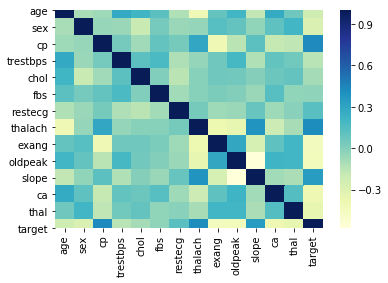

In [8]:
ax = sns.heatmap(corr, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = (30,30)
plt.show()

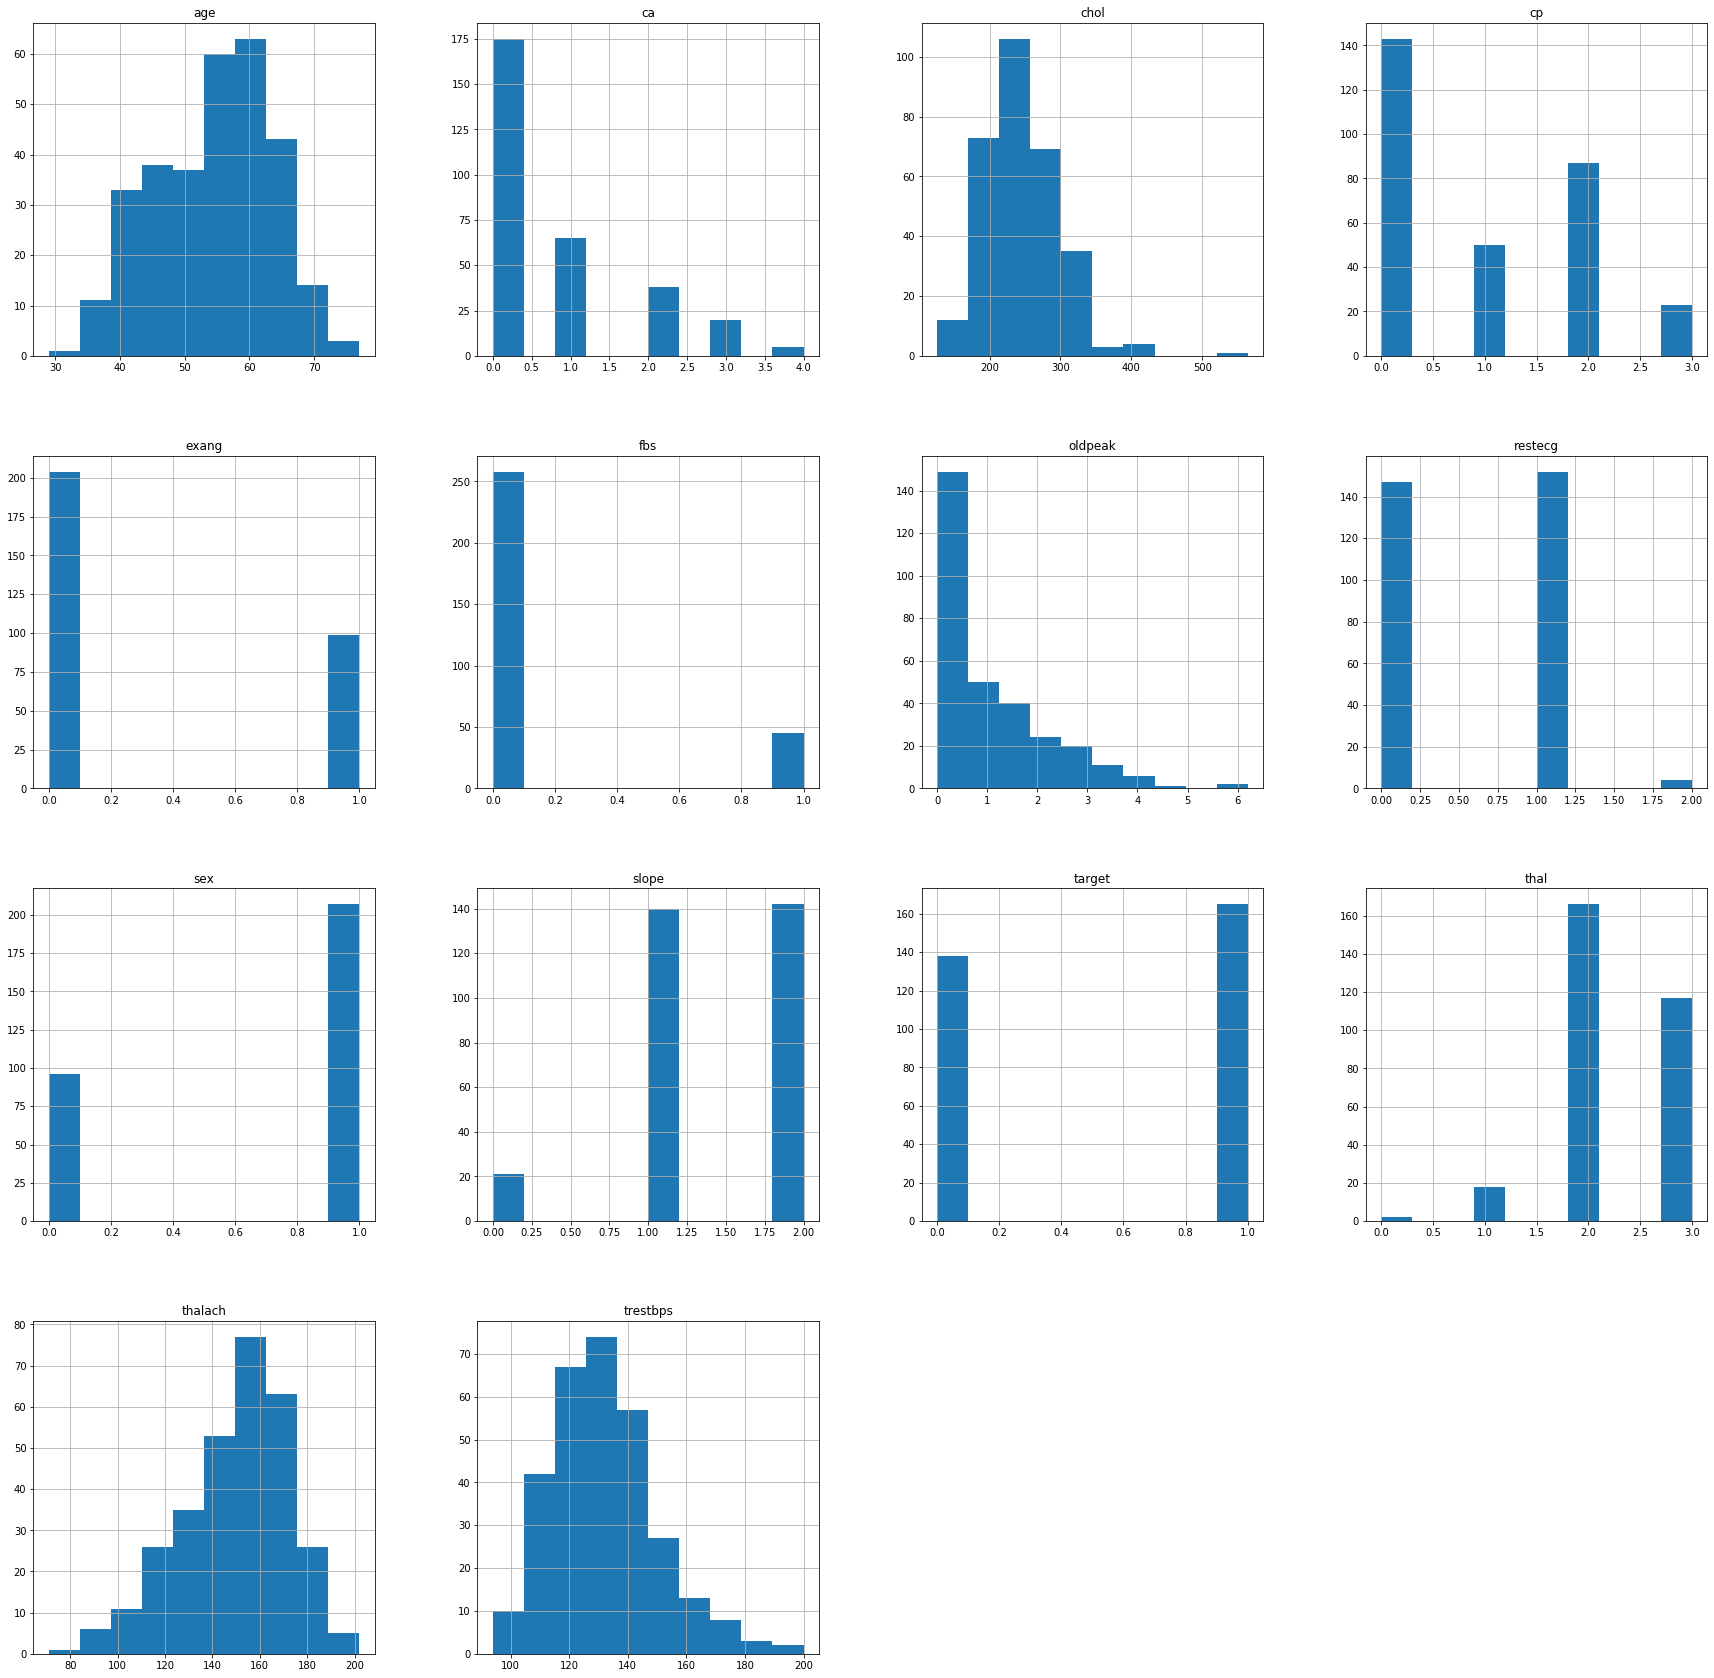

In [9]:
#Verificando comportamentos
data.hist()
plt.show()

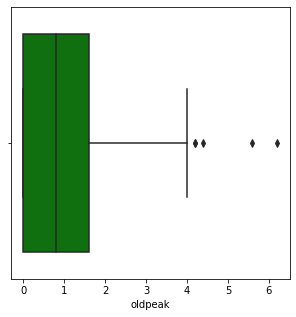

In [10]:
#Outliers
plt.figure(figsize=(5,5))
sns.boxplot(data.oldpeak, color = 'green')


In [11]:
#Separando variáveis e target
X = data.iloc[:,:13]
Y = data.iloc[:,13]

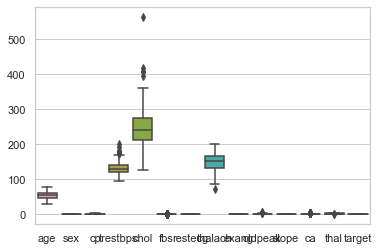

In [12]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=data);

Class 0: 138
Class 1: 165
Proportion: 0.84 : 1


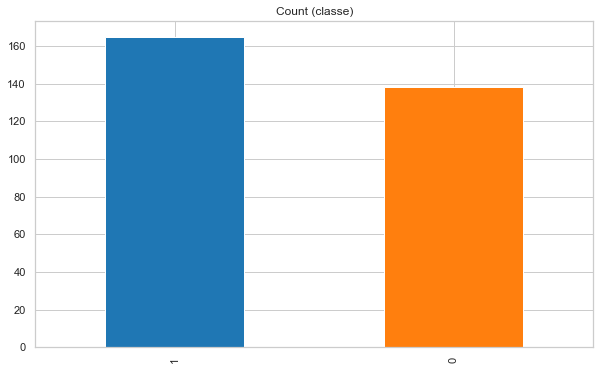

In [13]:
#Verificando as classes para ver se não estão desbalanceadas
target_count = data.target.value_counts()
plt.figure(figsize=(10,6))
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (classe)',color = ['#1F77B4', '#FF7F0E']);

In [14]:
#Função - retirando outliers
def out(n):
    mean = np.mean(n, axis=0)
    sd = np.std(n, axis=0)

    for x in n:
        if (x < mean - 2*sd):
             print(x)

In [15]:
out(data['chol'])

141
126
131


In [16]:
out(data['ca'])

In [17]:
out(data['oldpeak'])

In [18]:
#!pip install imblearn

In [19]:
#Arrumando o desbalanceamento
from imblearn.under_sampling import RandomUnderSampler
# Number of data points in the minority class
number_records_f= len(data[data.target == 0])
f_indices = np.array(data[data.target == 0].index)

# Picking the indices of the normal classes
normal_indices = data[data.target == 1].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_f)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([f_indices,random_normal_indices])


# Under sample dataset
under_sample_data = data.loc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'target']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'target']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.sex == 1])/len(under_sample_data))
print("Percentage of f transactions: ", len(under_sample_data[under_sample_data.sex == 0])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))


Percentage of normal transactions:  0.6485507246376812
Percentage of f transactions:  0.35144927536231885
Total number of transactions in resampled data:  276


In [20]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample,test_size = 0.2, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((220, 13), (56, 13))

In [22]:
y_train.shape,y_test.shape

((220, 1), (56, 1))

O XGBoost é um excelente algoritmo para análise de dados estruturados, que utiliza o Gradiente boosting. Ele foi criando na Universidade de Washington nos EUA. Trata-se de uma ferramenta poderosa de árvores de decisão que pode ser usada tanto em casos de regressão como de classificação. Ele é muito eficiente e flexível. Realizaremos a análise utilizando-o.

In [23]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

modelo_xg = xgb.XGBClassifier(learning_rate = 0.01, 
                              max_depth = 2, 
                              n_estimators = 1000,
                             min_child_weight = 5,
                             gamma = 0.1,
                             reg_alpha=1,
                            reg_lambda=1.5)
modelo_xg.fit(X_train,y_train)    
resultado2 = modelo_xg.predict_proba(X_test)[:,1]
valores_previstos2 = modelo_xg.predict(X_test)
score = roc_auc_score(y_test, resultado2)
score

/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jfs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9770408163265306

In [24]:
feature_imp = pd.Series(modelo_xg.feature_importances_,index=X.columns).sort_values(ascending=False)

In [25]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()



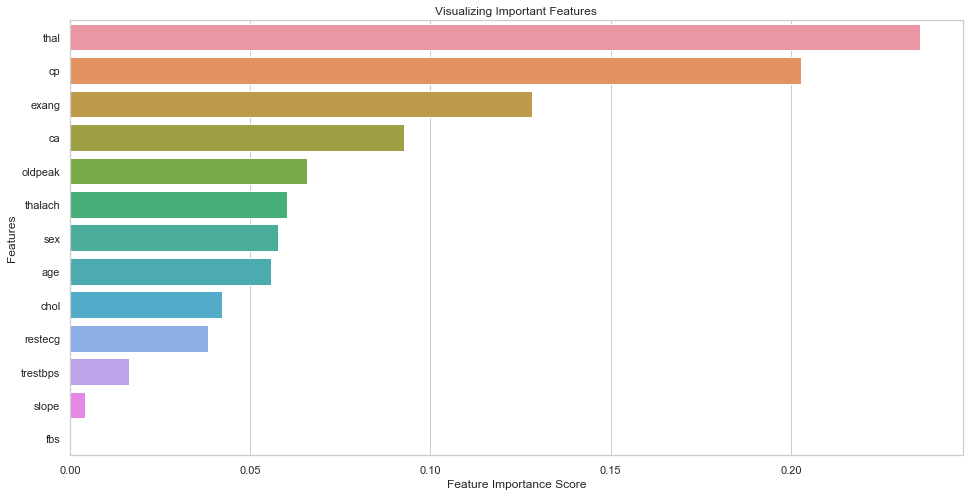

In [26]:
#Verificando os pesos de cada variável na predição
visualiza_features_importantes(feature_imp)


In [27]:
feature_imp

thal        0.235873
cp          0.202828
exang       0.128203
ca          0.092530
oldpeak     0.065731
thalach     0.060296
sex         0.057788
age         0.055867
chol        0.042117
restecg     0.038237
trestbps    0.016330
slope       0.004200
fbs         0.000000
dtype: float32

In [28]:
#Limitando as variáveis para observar o comportamento.
features_selecionadas = []
for feature,importancia in feature_imp.iteritems():
    if   importancia > 0.08 :
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

thal:	0.23587265610694885
cp:	0.20282788574695587
exang:	0.12820306420326233
ca:	0.09253023564815521


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X[features_selecionadas],
    Y,
    test_size=0.2,
    random_state=42
)

In [30]:
modelo_xg = xgb.XGBClassifier(learning_rate = 0.01, 
                              max_depth = 2, 
                              n_estimators = 1000,
                             min_child_weight = 5,
                             gamma = 0.1,
                             reg_alpha=1,
                            reg_lambda=1.5)
modelo_xg.fit(X_train,y_train)    
resultado2 = modelo_xg.predict_proba(X_test)[:,1]
valores_previstos2 = modelo_xg.predict(X_test)
score = roc_auc_score(y_test, resultado2)
score

0.8981681034482758